# Autoencoders and Variational Autoencoders (VAEs)

## Motivation

- most real world data is unlabelled, and we would like to be able to learn from it and use it
- a lot of data in inputs is not useful. How can we find the importance within it?

When we see things, we don't consciously percieve the wavelength of light hitting each of our individual cells. This is the very high dimensional, raw input data that your eyes recieve, but this information is too complex for us to use for planning and decision making etc. Instead, what we do is perform abstraction from it - we build up more meaningful, general and vague descriptions of the environment.
We percieve and would describe the scene using a few high level *features* such as: ' I see a face', 'It is smiling', 'It is nearby' rather than the millions of raw wavelengths. We somehow manage to map the high dimensional, low level wavelength data into much lower dimensional, high level concepts. The variables that we choose to represent the data in this lower dimensional space are called **latent variables**. 

## What is an autoencoder?

An autoencoder is a unsupervised machine learning model that can learn a latent representation of input data, that is a lower dimensional higher level 
An autoencoder learns to do so by passing the input through a neural network which attempts to output the same thing (or slightly different) as it is given as an input, whilst passing the data through a low dimensional bottleneck in between. We can determine a loss by taking the BCE loss between the input and its reconstruction at the output. This means that training requires no labels!

<img src="autoencoder.png">

A lower dimensional representation is much more easily interpretable than the higher dimensional input, as there is just less information to comprehend.
Having a trained autoencoder means that we have found a way to represent our data in a lower dimension with minimal loss.
Our inputs can be reconstructed 

We will train out autoencoder to come up with valuable ways of representing the data in interpretable, low-dimensional space, by attempting to minimise the binary cross entropy loss between the input image and its reconstruction.


In [20]:
import torch    # computational library saves us time and effort in building models
from torch.autograd import Variable     # for computational graphs
import matplotlib.pyplot as plt     # for plotting
from torchvision import datasets, transforms    # to get the dataset and then transform it into a tensor
import torch.nn.functional as F # functional stuff like our activation function
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from time import sleep

#%matplotlib inline
%matplotlib notebook

In [21]:
epochs = 1    # for how many runs through of the dataset?
lr = 0.001      # proportionality constant controlling parameter update size
batch_size = 128 # how large are the training batches?
latent_dim = 2  # how many dimensions does our latent variable have? we can plot it in 3

train_data = datasets.MNIST(root='data/',     # where to save/look for it
                         train=True,    # this is for training
                         transform=transforms.ToTensor(),   # transform it into a tensor of data
                         download=True) # yes, download it

test_data = datasets.MNIST(root='data/',
                           train=False,
                           transform=transforms.ToTensor(),
                           download=True)

# make a dataloader to generate us samples for training
training_samples = torch.utils.data.DataLoader(dataset=train_data,
                                               batch_size=batch_size,   # train on small batches of inputs
                                               shuffle=True)    # make sure to shuffle the data to avoid overfitting

testing_samples = torch.utils.data.DataLoader(dataset=test_data,
                                           batch_size=batch_size,
                                           shuffle=True)


In [22]:
class autoencoder(torch.nn.Module): # create a class for our autoencoder
    def __init__(self):
        super().__init__()

        # encoder
        self.e1 = torch.nn.Linear(784, 256)
        self.e2 = torch.nn.Linear(256, 64)
        self.e3 = torch.nn.Linear(64, latent_dim)

        # decoder
        self.d1 = torch.nn.Linear(latent_dim, 64)
        self.d2 = torch.nn.Linear(64, 256)
        self.d3 = torch.nn.Linear(256, 784)

    def encode(self, x): # compress our input into the latent space
        x = x.view(-1, 784)             # unroll
        z = F.relu(self.e1(x))
        z = F.relu(self.e2(z))
        z = self.e3(z)
        #print(z)
        return z

    def decode(self, z):
        x_pred = F.relu(self.d1(z))
        x_pred = F.relu(self.d2(x_pred))
        x_pred = F.sigmoid(self.d3(x_pred))
        return x_pred

    def forward(self, x):   # decode
        z = self.encode(x)
        x_pred = self.decode(z)
        return x_pred, z

The loss function we are going to use is the binary cross entropy between the pixels of the original image and its reconstruction.

In [23]:
def loss(x_hat, x):
    reconstruction_loss = F.binary_cross_entropy(x_hat, x.view(-1, 784))
    return reconstruction_loss

batch 0 cost 0.6946769952774048
batch 1 cost 0.687684953212738


<IPython.core.display.Javascript object>


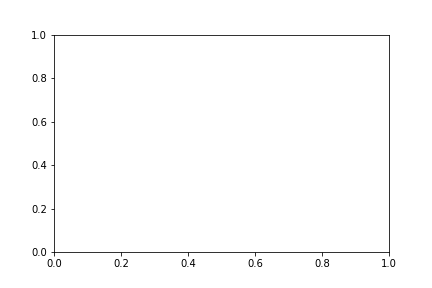

<IPython.core.display.Javascript object>


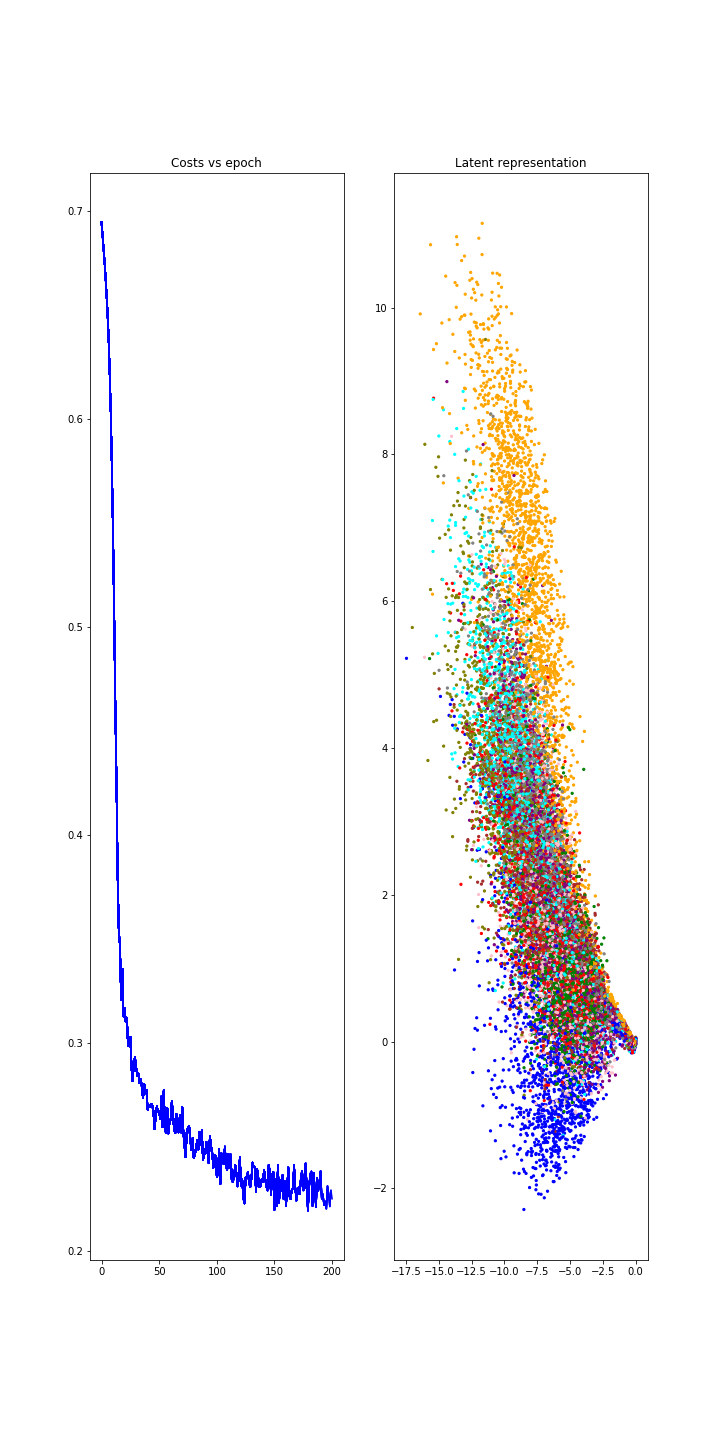

<IPython.core.display.Javascript object>


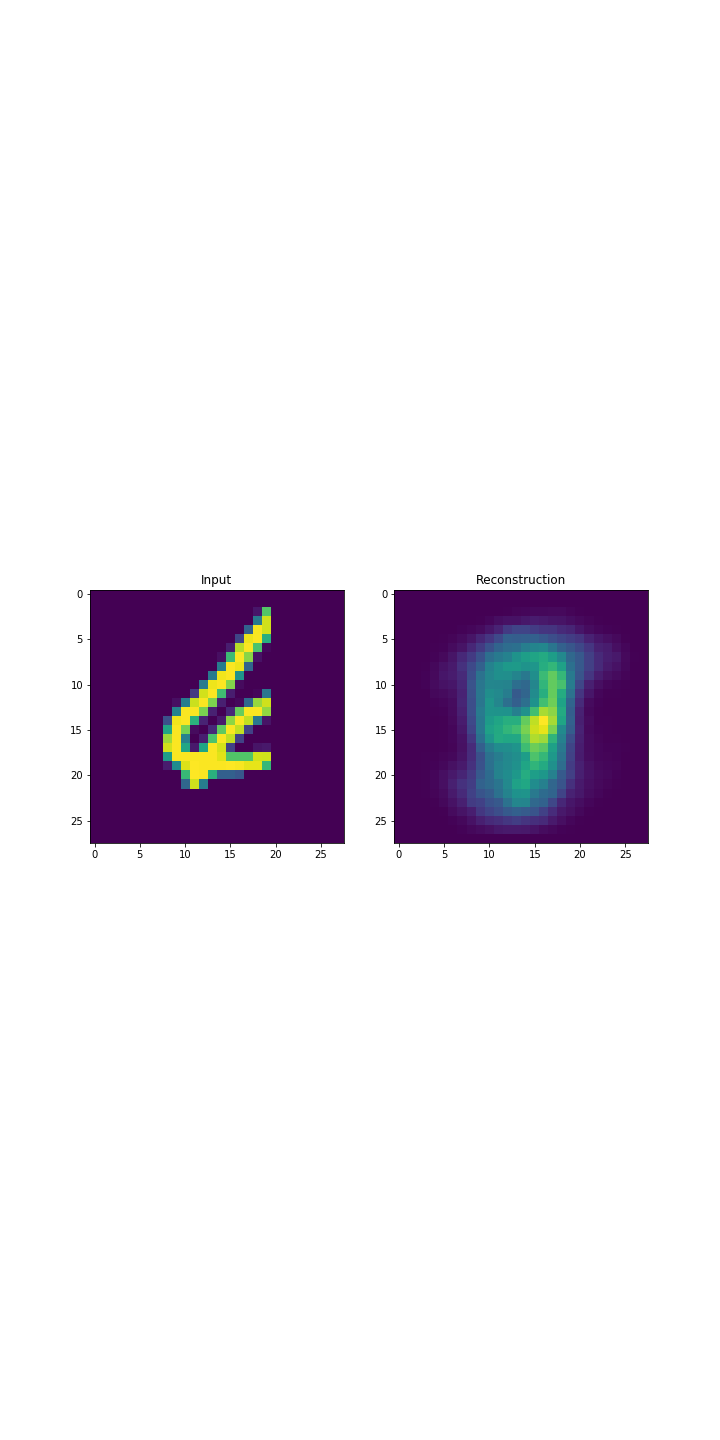

batch 2 cost 0.6803057193756104
batch 3 cost 0.6726709604263306
batch 4 cost 0.6633750796318054
batch 5 cost 0.6534652709960938
batch 6 cost 0.6411888599395752
batch 7 cost 0.6240845322608948
batch 8 cost 0.6034486889839172
batch 9 cost 0.576356053352356
batch 10 cost 0.5437114238739014
batch 11 cost 0.5047732591629028
batch 12 cost 0.46036890149116516
batch 13 cost 0.42474862933158875
batch 14 cost 0.38011983036994934
batch 15 cost 0.35341107845306396
batch 16 cost 0.34687840938568115
batch 17 cost 0.3205779492855072
batch 18 cost 0.3355676233768463
batch 19 cost 0.31268376111984253
batch 20 cost 0.316700279712677
batch 21 cost 0.3100598156452179
batch 22 cost 0.31177765130996704
batch 23 cost 0.2985878586769104
batch 24 cost 0.3004993796348572
batch 25 cost 0.302756667137146
batch 26 cost 0.2881750464439392
batch 27 cost 0.28160983324050903
batch 28 cost 0.29012325406074524
batch 29 cost 0.29292574524879456
batch 30 cost 0.28819236159324646
batch 31 cost 0.28423523902893066
batch 32 

In [27]:
fig1 = plt.figure(figsize=(10, 20))
ax1 = fig1.add_subplot(121)
ax1.set_title('Costs vs epoch')
ax2 = fig1.add_subplot(122)#, projection='3d')
ax2.set_title('Latent representation')

fig2 = plt.figure(figsize=(10, 20))
ax3 = fig2.add_subplot(121)
ax3.set_title('Input')
ax4 = fig2.add_subplot(122)
ax4.set_title('Reconstruction')


myautoencoder = autoencoder()
optimiser = torch.optim.Adam(myautoencoder.parameters(), lr=lr)#, weight_decay=0.0001)

def train():
    myautoencoder.train()   # put in training mode
    costs = []
    for i in range(epochs):
        for batch_index, (x, y) in enumerate(training_samples):

            x = Variable(x)
            #print('x shape', x.shape)
            x_pred, z = myautoencoder(x)  # (calls myvae.forward) generate an output

            cost = loss(x_pred, x)
            costs.append(cost.data)
            cost.backward()
            optimiser.step()
            optimiser.zero_grad()
            print('batch', batch_index, 'cost', cost.data[0])

            z = np.array(z.data)
            #print(z.shape)
            colordict = {0:'blue', 1:'orange', 2:'green', 3:'red', 4:'purple', 5:'brown', 6:'pink', 7:'gray', 8:'olive', 9:'cyan'}
            colorlist = [colordict[i] for i in y]
            ax2.scatter(z[:, 0], z[:, 1], c=colorlist, s=5)
            ax1.plot(costs, 'b')
            fig1.canvas.draw()

            if batch_index == 200:
                break
                
            if batch_index % 20:
                x = x.view(-1, 28, 28)
                x_pred = x_pred.view(-1, 28, 28)

                ax3.imshow(x.data[0])
                ax4.imshow(x_pred.data[0])
                plt.show()
                
train()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ioff()



### Use cases of autoencoders
#### Denoising
Autoencoders can be used to remove noise from images by training them to reconstruct images from those which have had noise added to them. In a similar way, they can also be used to remove watermarks or add colour to images.

<img src='denoising autoencoder.png'>

#### Learning latent representations

As we have seen, autoencoders can find a way to project input data down into a lower dimension whilst keeping it useful. They can extract higher level concepts from low dimensional data - essentially abstracting from the data.

**Autoencoders allow us to learn the higher level features within the raw data without using labels!**

### Problems with autoencoders

- the reconstruction of the input will be lossy, as information must be thrown away to compress the input down to a lower dimension. Many other techniques, like JPEG, far outperform autoencoders in terms of image comp
- the weights learned by the model are specific to the data it has been trained on. There is nothing preventing  a lot of latent space never being sampled for training. As such, the latent space may be sparse and can not be sampled from to produce an outpput. This prevents autoencoders being used as generative models.
- the diverging part of the model can not robustly be used to generate data, because the latent space may be filled with gaps where that model has not learnt to reconstruct any data from. 
- the latent representations for similar inputs/inputs may not be nearby in the latent space.

## Variational Autoencoders

One problem with autoencoders is that 

Variational autencoders are an upgrade on autoencoders. The VAE model differs from that of a standard autoencoder in two ways.

1. The latent representation  of a given input,which we reconstruct from, is stochastic. The encoder constists of two networks. The output of these two networks are two vectors which represent means and log(variances) respectively, in each dimension, for each input which we will use to sample to latent vector from. Now the latent vector is non-deterministic and leads to the model sampling from locations all around where the latent vector is centered - so the latent space becomes filled around the means. 

It's corresponding latent representation is then produced by sampling from a Gaussian characterised by these parameters. We are not learning *these* parameters, but the weights in the encoder network leading to them, which must make them useful for reconstructing the input later.

2. The loss function includes a KL-divergence term. KL-divergence is used to make distributions more similar; where functions have greatly different outputs, the KL-divergence will be large, and where they are the same, the KL-divergence will be zero. In our case we take the KL-divergence between our generated probability distributions, parameterised by our predicted means and variances, and a unit Gaussian (our prior, which we want to make our data distributed like. I.e. This part of the loss function forces distributions of the latent variables for each class to be centred around the origin and have unit variance. 

These two things allow us to use the model generatively, because the model has experience with what the reconstruction should be for a much greater range of latent inputs.

For a unit Gaussian prior, the graph of how the KL-divergence varies with variance (x) and mean (y) is show below:
<img src='KL.png'>

So our loss function becomes:

$ J = \frac{1}{2}\sum(h - y)^2 -\frac{1}{2}\sum (1 + log(\sigma^2) - \sigma^2 - \mu^2)$

The first term is the reconstruction loss, and the second term is the KL-divergence. They balance reconstruction and nearby samples 

They ensure that the latent space is filled, and that similar outputs occupy nearby regions in the latent space. They do this by minimising the difference between how the latent variables are distributed compared wth some prior (initially expected) distribution, $p(z)$. We usually take our prior distribution over $z$ to be a unit Gaussian - a reasonable assumption, as lots of things in real life are distributed normally.
So each latent variable now is forced to be distributed normally around zero, with unit variance. This 





In [ ]:
import torch    # computational library saves us time and effort in building models
from torch.autograd import Variable     # for computational graphs
import matplotlib.pyplot as plt     # for plotting
from torchvision import datasets, transforms    # to get the dataset and then transform it into a tensor
import torch.nn.functional as F # functional stuff like our activation function
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from time import sleep

epochs = 1    # for how many runs through of the dataset?
lr = 0.02      # proportionality constant controlling parameter update size
batch_size = 128 # how large are the training batches?
latent_dim = 40  # how many dimensions does our latent variable have? we can plot it in 3
beta = 1

train_data = datasets.FashionMNIST(root='fashiondata/',     # where to save/look for it
                         train=True,    # this is for training
                         transform=transforms.ToTensor(),   # transform it into a tensor of data
                         download=True) # yes, download it

test_data = datasets.FashionMNIST(root='fashiondata/',
                           train=False,
                           transform=transforms.ToTensor(),
                           download=True)

# make a dataloader to generate us samples for training
training_samples = torch.utils.data.DataLoader(dataset=train_data,
                                               batch_size=batch_size,   # train on small batches of inputs
                                               shuffle=True)    # make sure to shuffle the data to avoid overfitting

testing_samples = torch.utils.data.DataLoader(dataset=test_data,
                                           batch_size=batch_size,
                                           shuffle=True)

class VAE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # encoder to means and standard deviations
        self.to_mu1 = torch.nn.Linear(784, 256)
        self.to_mu2 = torch.nn.Linear(256, 64)
        self.to_mu3 = torch.nn.Linear(64, latent_dim)

        self.to_logvar1 = torch.nn.Linear(784, 256)
        self.to_logvar2 = torch.nn.Linear(256, 64)
        self.to_logvar3 = torch.nn.Linear(64, latent_dim)

        # decoder
        self.d1 = torch.nn.Linear(latent_dim, 64)
        self.d2 = torch.nn.Linear(64, 256)
        self.d3 = torch.nn.Linear(256, 784)

    def encode(self, x):
        x = x.view(-1, 784)

        mu = F.relu(self.to_mu1(x))
        mu = F.relu(self.to_mu2(mu))
        mu = self.to_mu3(mu)

        logvar = F.relu(self.to_logvar1(x))
        logvar = F.relu(self.to_logvar2(logvar))
        logvar = self.to_logvar3(logvar)

        return mu, logvar

    def reparameterize(self, mu, logvar):
        epsilon = Variable(torch.Tensor(np.random.randn(batch_size, latent_dim)))
        z = mu + epsilon * (0.5*logvar).exp()
        return z

    def decode(self, z):
        x_pred = F.relu(self.d1(z))
        x_pred = F.relu(self.d2(x_pred))
        x_pred = F.sigmoid(self.d3(x_pred))
        #print(x_pred.shape)
        return x_pred

    def forward(self, x):
        mu, logvar = self.encode(x) # the output for the sd does not make sense to be negative, so predict log(var)
        z = self.reparameterize(mu, logvar)
        x_pred = self.decode(z)
        return x_pred, z, mu, logvar

def VAEloss(x_hat, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(x_hat, x.view(-1, 784), size_average=False)
    #print(reconstruction_loss.data[0])
    KL_divergence = - 0.5 * torch.sum(1 + logvar - mu**2 - logvar.exp())
    #print(KL_divergence.data[0])
    return reconstruction_loss + beta * KL_divergence

fig1 = plt.figure(figsize=(10, 20))
ax1 = fig1.add_subplot(121)
ax1.set_title('Costs vs epoch')
#ax1.set_ylim(0, 500)
ax2 = fig1.add_subplot(122)
ax2.set_title('Latent representation')

fig2 = plt.figure(figsize=(10, 20))
ax3 = fig2.add_subplot(121)
ax3.set_title('Input')
ax4 = fig2.add_subplot(122)
ax4.set_title('Reconstruction')

plt.ion()
plt.show()

myVAE = VAE()
optimiser = torch.optim.Adam(myVAE.parameters(), lr=lr)

def trainVAE():
    myVAE.train()   # put in training mode
    costs = []
    for epoch in range(epochs):
        for batch_index, (x, y) in enumerate(training_samples):

            x = Variable(x)
            #print('x shape', x.shape)
            #optimiser.zero_grad()
            x_pred, z, mu, logvar = myVAE(x)  # (calls myvae.forward) generate an output

            cost = VAEloss(x_pred, x, mu, logvar)
            costs.append(cost.data)
            cost.backward()
            optimiser.step()
            optimiser.zero_grad()
            print('Epoch', epoch, 'batch', batch_index, 'cost', cost.data[0])

            z = np.array(z.data) # for plotting
            colordict = {0:'blue', 1:'orange', 2:'green', 3:'red', 4:'purple', 5:'brown', 6:'pink', 7:'gray', 8:'olive', 9:'cyan'}
            colorlist = [colordict[i] for i in y]
            ax2.scatter(z[:, 0], z[:, 1], c=colorlist, s=5)
            ax1.plot(costs, 'b')
            fig1.canvas.draw()

            if batch_index % 20:
                x = x.view(-1, 28, 28)
                x_pred = x_pred.view(-1, 28, 28)

                ax3.imshow(x.data[0])
                ax4.imshow(x_pred.data[0])

                fig2.canvas.draw()

            if batch_index == 30:
                ax2.clear()

            if batch_index == 200:
                #return ax2
                break


trainVAE()
torch.save(myVAE, 'trainedVAE.pt')

fig = plt.figure()
ax = fig.add_subplot(111)
#plt.ioff()


## Beta Variational Autencoders

So for VAEs, we have two terms in the loss function: the reconstruction loss which makes sure that we get back a similar image to our input. And the KL-divergence, which ensures that the latent space which a realistic output can be generated from is continuous, and that similar examples are nearby in the latent space. 
Beta-VAEs use another hyperparameter (Beta) to scale the KL-divergence part of the loss